# MIDTERM CS370

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits.



**Solution:**
<br>
Bent coin has probability h=0.7 and t =0.3.
<br>
The entropy H(X) = -∑ i=1 through n pi*log2(pi)
<br>
H(X)= -(0.7log(0.7) + 0.3 log(0.3)) = 0.881
<br>
The entropy is less than one bit. Since the probability of 0.7 of heads is greater than the tails probability of 0.3, the coin has a greater proabability of landing a heads and therefore the entropy is less than 1 bit. If the probability of heads and tails was 0.5 then the entropy would be 1 as there is an equal chance of landing a head and a tail.


#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

<ipython-input-4-2b000cec9e2d>:6: RuntimeWarning: divide by zero encountered in log2
  return -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails))
<ipython-input-4-2b000cec9e2d>:6: RuntimeWarning: invalid value encountered in scalar multiply
  return -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails))


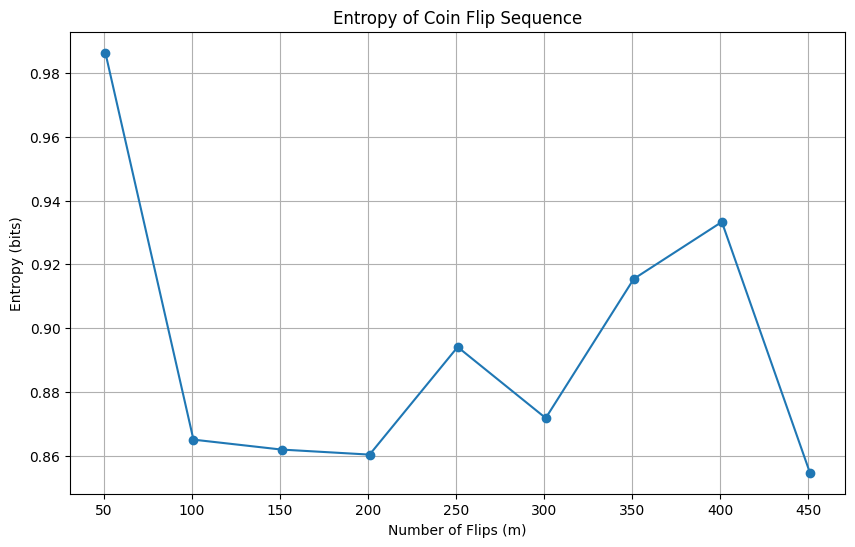

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate entropy
def entropy(p_heads, p_tails):
    return -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails))

# Calculate entropy for each value of m
m_values = range(1, 501, 50)
entropy_values = []

for m in m_values:
    # Probability of heads and tails
    p_heads = 0.7
    p_tails = 1 - p_heads

    # Number of heads and tails based on binomial distribution
    x_heads = np.random.binomial(m, p_heads)
    x_tails = m - x_heads

    # Calculate probabilities of heads and tails based on observed outcomes
    p_heads_observed = x_heads / m
    p_tails_observed = x_tails / m

    # Calculate entropy based on observed probabilities
    entropy_val = entropy(p_heads_observed, p_tails_observed)
    entropy_values.append(entropy_val)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(m_values, entropy_values, marker='o', linestyle='-')
plt.title('Entropy of Coin Flip Sequence')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.show()


**Explanation of Code**
<br>
In the entropy function, it used the H(X) formula to calculate the entropy of heads and tails. The formula is H(X) = -∑ i=1 through n pi*log2(pi). So to calculte the p-heads and p_tails, it is -(p_heads * np.log2(p_heads) + p_tails * np.log2(p_tails)).
<br>
Then the m_values is generated using range as specified in the question, m should be from 0 to 500 with steps of 50.
<br>
For loop is used to iterate over m values. Binomial distribution is used to calculate random number of heads and the tails is generated from the complement by using m-xheads. Then the probabiities of heads and tails are calculated. Using these observed probabilities, it calculates the entropy of the coin flip sequence using the entropy() function and appends it to the entropy_values list.
<br>
Finally, the entropy values and the number of flips are plotted.

**Results:**
<br>
As seen in the plot, entropy is higher when it is 50 flips, but the entropy decreases as the flips increases.
<br>
Higher entropy means there is higher uncertainty about the outcome.
<br>
As the number of flips increases, the entropy decreases, indicating less uncertainty as the sequence becomes more predictable.

#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here.

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100].

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



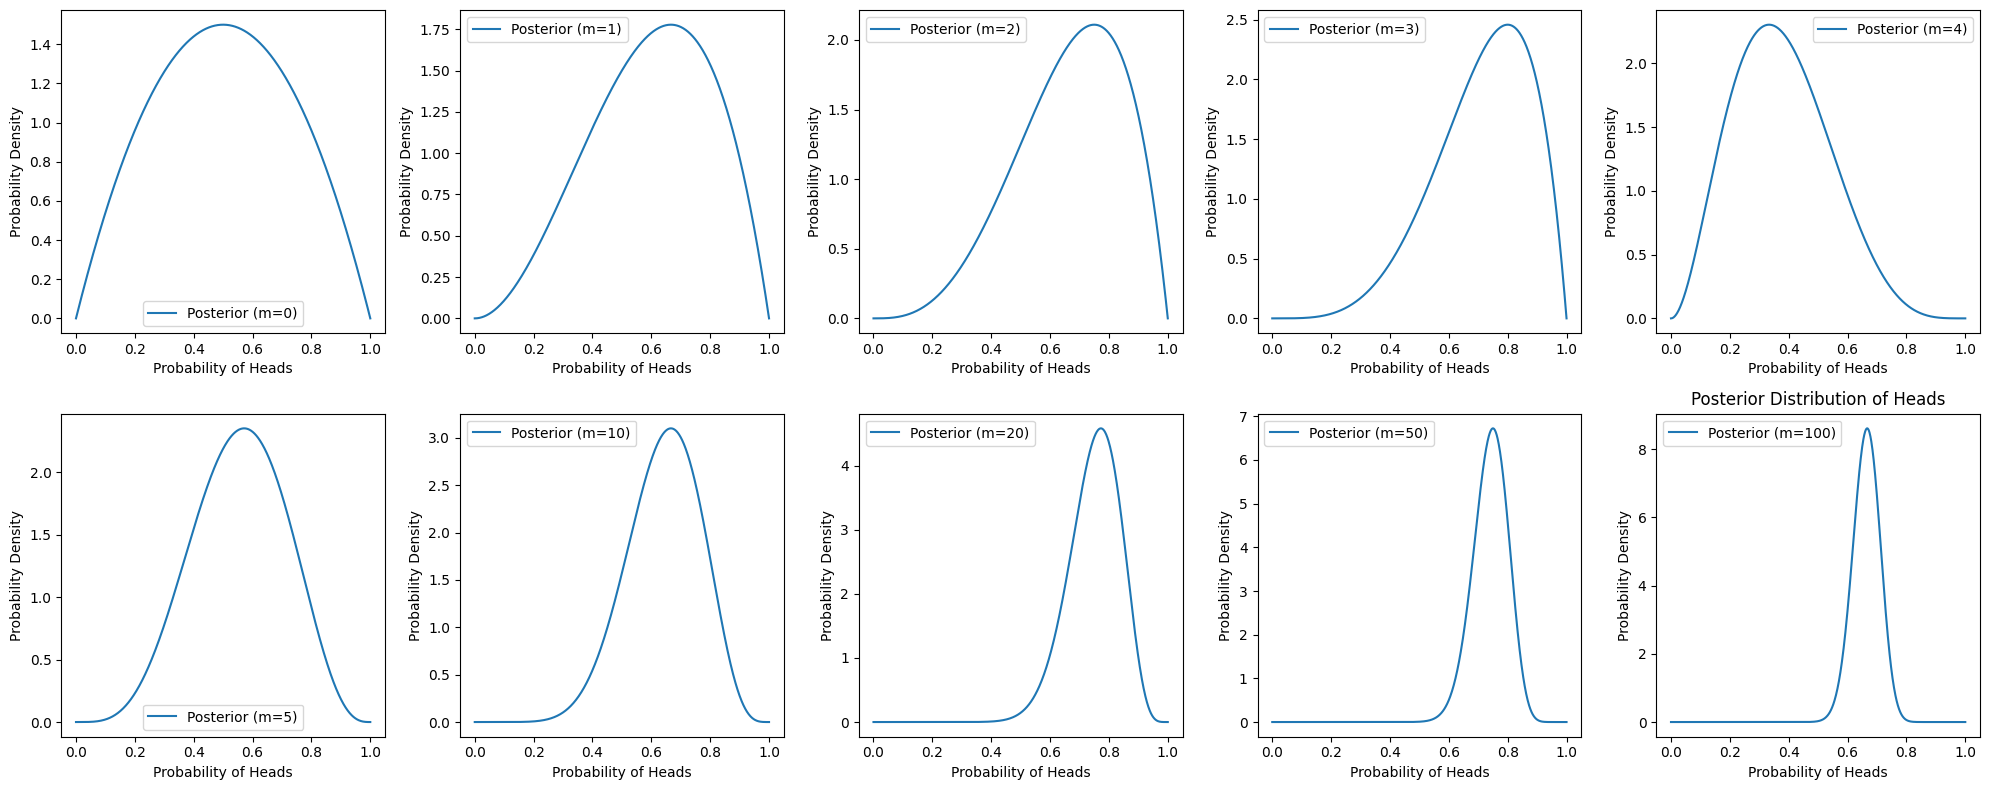

m	Mean	Variance
0	0.5000	0.0500
1	0.6000	0.0400
2	0.6667	0.0317
3	0.7143	0.0255
4	0.3750	0.0260
5	0.5556	0.0247
10	0.6429	0.0153
20	0.7500	0.0075
50	0.7407	0.0035
100	0.6635	0.0021


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for prior Beta distribution
alpha_prior = 2   # Alpha parameter for Beta prior
beta_prior = 2    # Beta parameter for Beta prior

# Sequence of observed flips (heads and tails)
flips = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Lists to store means and variances of posterior distributions
means = []
variances = []

# Create a single figure with two rows of subplots, each containing 5 plots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Iterate over each number of flips
for i, m in enumerate(flips):
    # Simulate coin flips
    flips_sequence = np.random.choice([0, 1], size=m, p=[0.3, 0.7])  # 0 represents tails, 1 represents heads

    # Count the number of heads and tails observed
    heads_observed = np.sum(flips_sequence)
    tails_observed = m - heads_observed

    # Update Beta distribution parameters based on observed flips
    alpha_post = alpha_prior + heads_observed
    beta_post = beta_prior + tails_observed

    # Calculate mean and variance of posterior Beta distribution
    mean_post = beta.mean(alpha_post, beta_post)
    var_post = beta.var(alpha_post, beta_post)

    # Append mean and variance to lists
    means.append(mean_post)
    variances.append(var_post)

    # Determine subplot position based on index i
    row = i // 5
    col = i % 5

    # Plot the posterior distribution for the current number of flips
    x = np.linspace(0, 1, 1000)
    axes[row, col].plot(x, beta.pdf(x, alpha_post, beta_post), label=f'Posterior (m={m})')

    axes[row, col].set_xlabel('Probability of Heads')
    axes[row, col].set_ylabel('Probability Density')
    axes[row, col].legend()

# Adjust layout and display the plots

plt.tight_layout()
plt.show()

# Print table of means and variances
print("m\tMean\tVariance")
for i in range(len(flips)):
    print("{}\t{:.4f}\t{:.4f}".format(flips[i], means[i], variances[i]))


**Explanation of Code**
<br>
alpha_prior and beta_prior are parameters for the prior Beta distribution, representing the initial beliefs about the probability of heads before observing any data.
<br>
means and variances are lists used to store the mean and variance of the posterior Beta distribution for each number of flips in the flips sequence.
<br>
10 subplots are created with 2 rows so each row containing 5 plots.
<br>
For loop is used to iterate over each number of flips.For each m, it simulates coin flips, updates the Beta distribution parameters based on the observed flips, and calculates the mean and variance of the posterior Beta distribution.
<br>
It then plots the distribution for current number of flips on the subplot.
<br>
After plotting, a table of means and variances is printed.

**Results:**
<br>
Based on the plots and the table, it can be seen that as the number of flip increases, the posterior distributions become narrower and peak closer to the true underlying probability of heads. It can be seen that the curve becomes more narrower. For instance, there is a drastic change in the graph when m=0 and m=100. The mean and variances also changes as the m value increases.

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases.

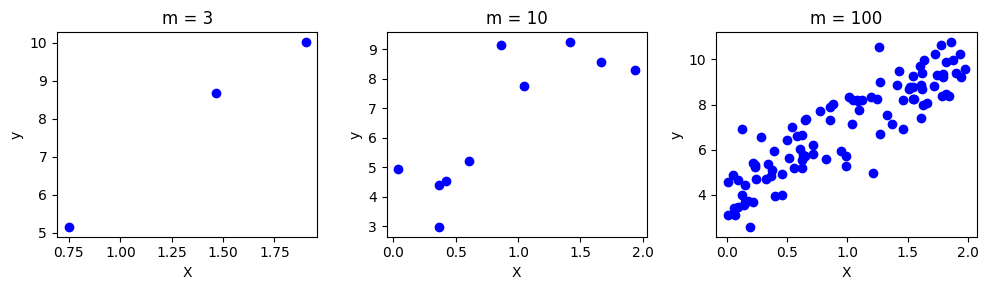

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # to make this code example reproducible
m_values = [3, 10, 100]  # number of instances

plt.figure(figsize=(10, 3))

for i, m in enumerate(m_values, start=1):
    X = 2 * np.random.rand(m, 1)  # column vector
    y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

    # Plot the generated data points
    plt.subplot(1, len(m_values), i)
    plt.scatter(X, y, color='blue')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'm = {m}')

plt.tight_layout()
plt.show()


**Modified Code Explanation:**
<br>
Random seed is used so the same number will be generated everytime.
<br>
m_values is defined to [3,10,100] based on the question.
<br>
The for loop is used to iterate over specific m values.
<br>
Since the X is generated randomly between 0 and 2, it is 2*np.rand(m,1)
<br>
The y or the target values comes from the equation y=4+3X and the random noise is added.
<br>
The subplots are created for m=3,10,and 100
<br>
The generated data points are plotted using the plt.scatter
<br>
The labels and title are plotted.
<br>
The tight_layout makes sure that there is no overlapping in the subplots.

**Results:**
<br>
Overall, the plots represent the distribution of data ponts as m increases.
<br>
With more instances of m, the dataset covers a wider range of input features and target values.

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py).

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

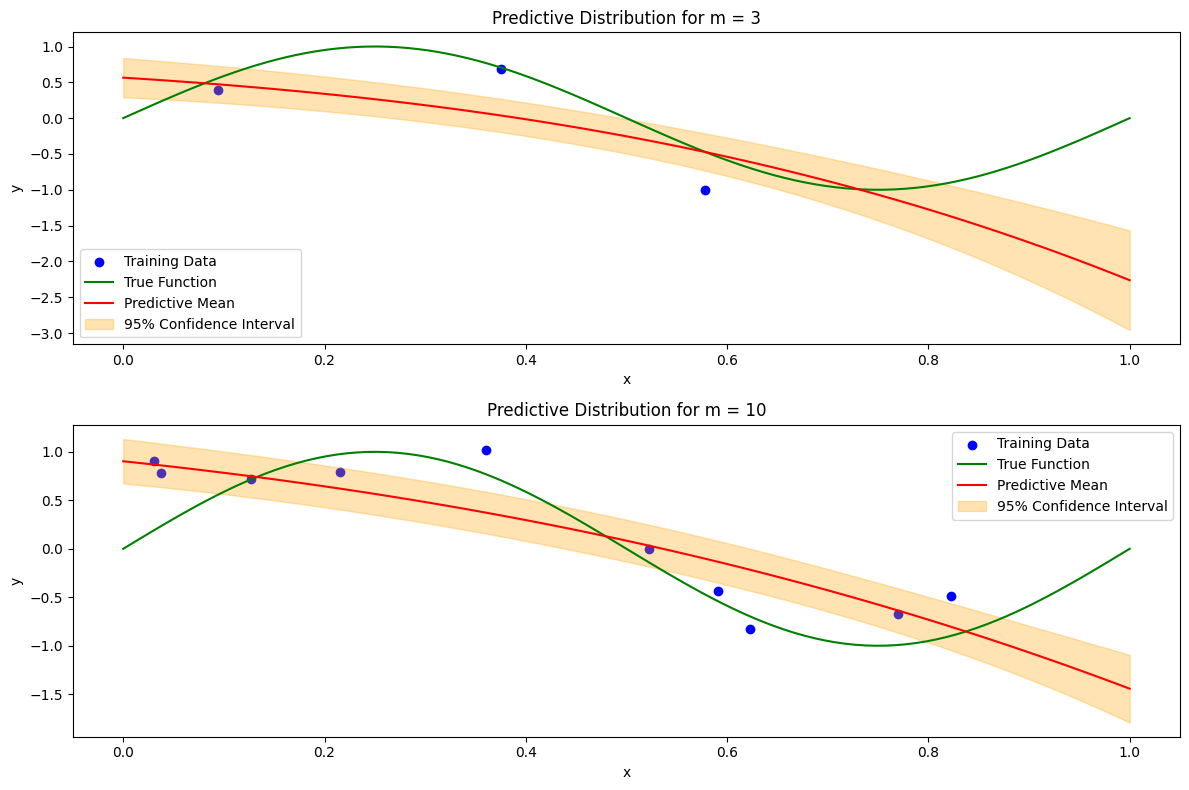

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate polynomial features
def generate_poly_features(X, degree):
    X_poly = np.ones((len(X), 1))
    for d in range(1, degree + 1):
        X_poly = np.c_[X_poly, X ** d]
    return X_poly

# Function to compute predictive distribution mean and variance
def compute_predictive_distribution(X, y, X_test, alpha, beta):
    degree = 3
    X_poly = generate_poly_features(X, degree)
    X_test_poly = generate_poly_features(X_test, degree)
    S = np.linalg.inv(alpha * np.eye(X_poly.shape[1]) + beta * X_poly.T @ X_poly)
    mu = beta * X_test_poly @ S @ X_poly.T @ y.flatten()  # Ensure y is 1-dimensional
    sigma_squared = 1 / beta + np.sum(X_test_poly @ S * X_test_poly, axis=1)
    sigma = np.sqrt(sigma_squared)
    return mu, sigma

# Generate dataset with m = 3 and m = 10
m_values = [3, 10]
alpha = 2
beta = 25
X_true = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * X_true)

plt.figure(figsize=(12, 8))

for i, m in enumerate(m_values, start=1):
    # Generate dataset
    X = np.random.rand(m, 1)
    y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.3, (m, 1))

    # Compute predictive distribution
    X_test = np.linspace(0, 1, 100)
    y_test_true = np.sin(2 * np.pi * X_test)
    mu, sigma = compute_predictive_distribution(X, y, X_test, alpha, beta)

    # Plot
    plt.subplot(2, 1, i)
    plt.scatter(X, y, color='blue', label='Training Data')
    plt.plot(X_true, y_true, color='green', label='True Function')
    plt.plot(X_test, mu, color='red', label='Predictive Mean')
    plt.fill_between(X_test.squeeze(), mu - sigma, mu + sigma, color='orange', alpha=0.3, label='95% Confidence Interval')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Predictive Distribution for m = {m}')
    plt.legend()

plt.tight_layout()
plt.show()


**Part 1:**
<br>
The function to generate polynomial features is created by raising the degree of original features.
<br>
For instance, if the degree is 3 for X then the function will generate X^0,X^1,X^2,X^3.
<br>
This is useful to fit non-linear relationships using linear regression models.
<br>
The function also builds a matrix where each represents a point and and each column represents a polynomial feature.

**Part 2:**
<br>
The next function compute_predictive_distribution calculates predictive distribution for Bayesian linear regression.
<br>
Parameters used in the function represent X as input features and y as targets using linear function. Hyperparameters alpha and beta are used to capture the uncertainity.
<br>
X_poly is used to generate polynomial features for both the training data(X) and test data (X_test).
<br>
Then it uses the posterior mean and covariance matrix to calculate predictive mean and standard deviation for the test data.

**Part 3:**
<br>
For each data set, random values for input features is generated withing range from 0 to 2.
<br>
Then the y is derived from the linear function y=4+3X.

**Part 4:**
<br>
For each dataset size (m = 3 and m = 10), it computes the predictive distribution using the compute_predictive_distribution function.
<br>
Training data is plotted and the true underlying function is used to generate the data, predictive mean, and confidence intervals.
<br>
The confidence intervals indicates the uncertainty in predictions.

**Results:**
<br>
Based on the plot for m=3, the training data is small so there is an increase in the uncertainty as it is unclear of the relationship between the input features and targets.
<br>
The predictive mean (red line) may not fit the true underlying function completely.
<br>
The confidence intervals around the predictive mean are wider which indicates high uncertainity in the predictions.
<br>
Few data points leades to less reliable predictions.
<br>
<br>
Based on the plot for m=10, there is larger amount of data so there is more information to find the relationship between input features and targets.
<br>
In this plot, the predictive distribution is more certain and the predictive mean (red line) also aligns more closey to the true underlying function (green line) because the model has more data points.
<br>
The confidence intervals around the predictive mean are more narrower which indicates lower uncertainity.
<br>
<br>
Overall, With more training data, the model can better capture the underlying relationship in the data and make more accurate predictions. But with limited training data, the model's predictions become more uncertain and less reliable.